In [3]:
import torch

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
torch.__version__

'2.6.0+rocm6.2.4'

In [6]:
from torch import nn

In [11]:
torch.cuda.is_available()

False

In [12]:
class LinearregressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias

In [13]:
x=torch.arange(1,10.1,0.2)
y=(0.7*x)+0.3 # weight is 0.7 and 0.3 is bias

In [14]:
x

tensor([ 1.0000,  1.2000,  1.4000,  1.6000,  1.8000,  2.0000,  2.2000,  2.4000,
         2.6000,  2.8000,  3.0000,  3.2000,  3.4000,  3.6000,  3.8000,  4.0000,
         4.2000,  4.4000,  4.6000,  4.8000,  5.0000,  5.2000,  5.4000,  5.6000,
         5.8000,  6.0000,  6.2000,  6.4000,  6.6000,  6.8000,  7.0000,  7.2000,
         7.4000,  7.6000,  7.8000,  8.0000,  8.2000,  8.4000,  8.6000,  8.8000,
         9.0000,  9.2000,  9.4000,  9.6000,  9.8000, 10.0000])

In [15]:
y

tensor([1.0000, 1.1400, 1.2800, 1.4200, 1.5600, 1.7000, 1.8400, 1.9800, 2.1200,
        2.2600, 2.4000, 2.5400, 2.6800, 2.8200, 2.9600, 3.1000, 3.2400, 3.3800,
        3.5200, 3.6600, 3.8000, 3.9400, 4.0800, 4.2200, 4.3600, 4.5000, 4.6400,
        4.7800, 4.9200, 5.0600, 5.2000, 5.3400, 5.4800, 5.6200, 5.7600, 5.9000,
        6.0400, 6.1800, 6.3200, 6.4600, 6.6000, 6.7400, 6.8800, 7.0200, 7.1600,
        7.3000])

In [16]:
split_variable=int((0.8*len(x)))

In [17]:
x_train,y_train=x[:split_variable],y[:split_variable]
x_test,y_test=x[split_variable:],y[split_variable:]

In [18]:
x_train

tensor([1.0000, 1.2000, 1.4000, 1.6000, 1.8000, 2.0000, 2.2000, 2.4000, 2.6000,
        2.8000, 3.0000, 3.2000, 3.4000, 3.6000, 3.8000, 4.0000, 4.2000, 4.4000,
        4.6000, 4.8000, 5.0000, 5.2000, 5.4000, 5.6000, 5.8000, 6.0000, 6.2000,
        6.4000, 6.6000, 6.8000, 7.0000, 7.2000, 7.4000, 7.6000, 7.8000, 8.0000])

In [19]:
x_test

tensor([ 8.2000,  8.4000,  8.6000,  8.8000,  9.0000,  9.2000,  9.4000,  9.6000,
         9.8000, 10.0000])

In [20]:
def plot_predictions(train_data=x_train,train_label=y_train,test_data=x_test,test_label=y_test,predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_label,c='y',s=5,label="train data")
    plt.scatter(test_data,test_label,c='g',s=5,label="test data")
    #plt.scatter(test_data,predictions,c='r',s=5,label="predictions")
    plt.legend(prop={'size':10})

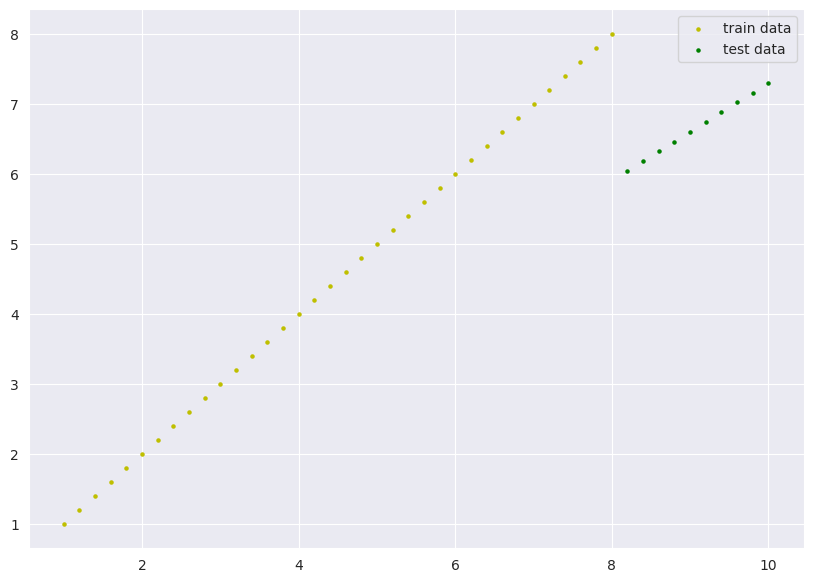

In [21]:
plot_predictions(x_train,x_train,x_test,y_test)

In [22]:
len(x_train),len(y_train)

(36, 36)

In [23]:
model_0=LinearregressionModel()

In [24]:
model_0

LinearregressionModel()

In [25]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.0401], requires_grad=True),
 Parameter containing:
 tensor([-0.7063], requires_grad=True)]

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.0401])), ('bias', tensor([-0.7063]))])

In [27]:
y_preds=model_0.forward(x_test)

In [28]:
y_preds

tensor([-1.0352, -1.0433, -1.0513, -1.0593, -1.0673, -1.0753, -1.0834, -1.0914,
        -1.0994, -1.1074], grad_fn=<AddBackward0>)

In [29]:
y_test

tensor([6.0400, 6.1800, 6.3200, 6.4600, 6.6000, 6.7400, 6.8800, 7.0200, 7.1600,
        7.3000])

In [30]:
with torch.inference_mode():
    y_preds=model_0.forward(x_test)

In [31]:
y_preds

tensor([-1.0352, -1.0433, -1.0513, -1.0593, -1.0673, -1.0753, -1.0834, -1.0914,
        -1.0994, -1.1074])

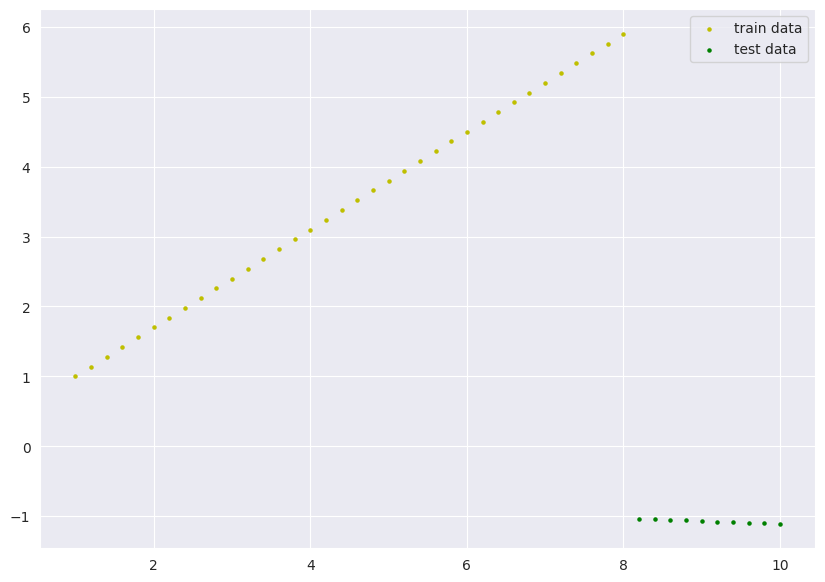

In [32]:
plot_predictions(x_train,y_train,x_test,y_preds)

In [33]:
loss=nn.L1Loss()

In [34]:
optimizer=torch.optim.SGD(model_0.parameters(),lr=0.001)

In [35]:
# an epoch is 1 loop through dta
# this is training
epochs=10000
for epoch in range(epochs):
    model_0.train()
    y_pred=model_0.forward(x_train)
    loss_data=loss(y_pred,y_train)
    optimizer.zero_grad()
    loss_data.backward()
    optimizer.step()
    print(loss_data)

tensor(4.3368, grad_fn=<MeanBackward0>)
tensor(4.3155, grad_fn=<MeanBackward0>)
tensor(4.2943, grad_fn=<MeanBackward0>)
tensor(4.2730, grad_fn=<MeanBackward0>)
tensor(4.2518, grad_fn=<MeanBackward0>)
tensor(4.2305, grad_fn=<MeanBackward0>)
tensor(4.2093, grad_fn=<MeanBackward0>)
tensor(4.1880, grad_fn=<MeanBackward0>)
tensor(4.1668, grad_fn=<MeanBackward0>)
tensor(4.1455, grad_fn=<MeanBackward0>)
tensor(4.1243, grad_fn=<MeanBackward0>)
tensor(4.1030, grad_fn=<MeanBackward0>)
tensor(4.0818, grad_fn=<MeanBackward0>)
tensor(4.0605, grad_fn=<MeanBackward0>)
tensor(4.0393, grad_fn=<MeanBackward0>)
tensor(4.0180, grad_fn=<MeanBackward0>)
tensor(3.9968, grad_fn=<MeanBackward0>)
tensor(3.9755, grad_fn=<MeanBackward0>)
tensor(3.9543, grad_fn=<MeanBackward0>)
tensor(3.9330, grad_fn=<MeanBackward0>)
tensor(3.9118, grad_fn=<MeanBackward0>)
tensor(3.8905, grad_fn=<MeanBackward0>)
tensor(3.8693, grad_fn=<MeanBackward0>)
tensor(3.8480, grad_fn=<MeanBackward0>)
tensor(3.8268, grad_fn=<MeanBackward0>)


In [36]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7047])), ('bias', tensor([0.2953]))])

In [37]:
with torch.inference_mode():
    y_preds=model_0.forward(x_test)

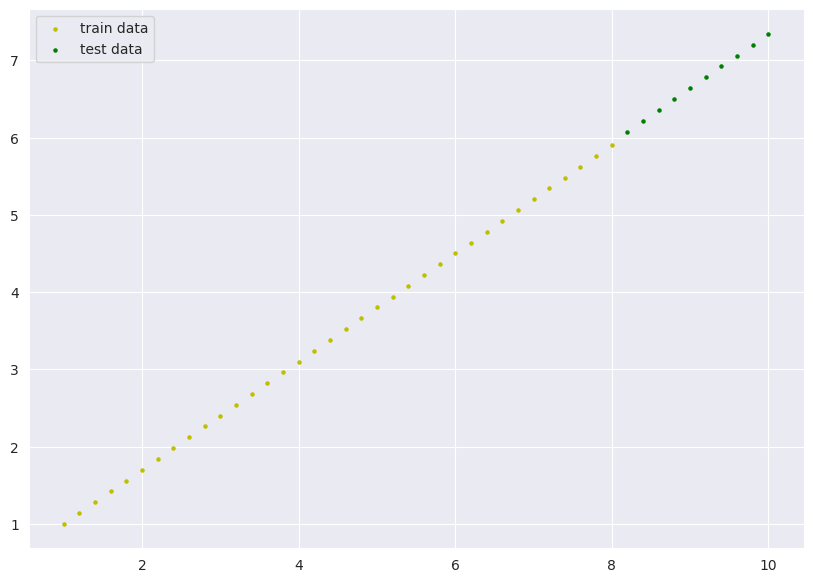

In [38]:
plot_predictions(x_train,y_train,x_test,y_preds)

In [39]:
model_0.eval()

LinearregressionModel()

In [40]:
with torch.inference_mode():
    y_pred=model_0.forward(x_test)

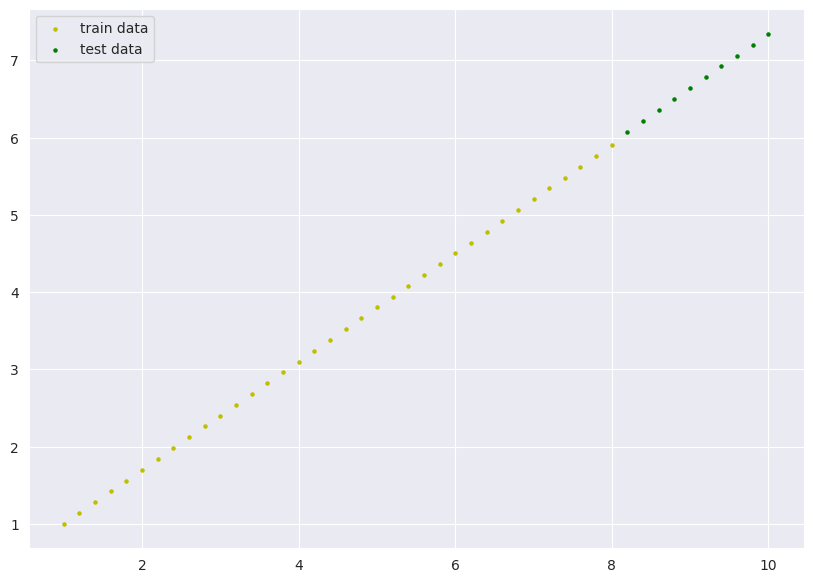

In [41]:
plot_predictions(x_train,y_train,x_test,y_pred)

In [42]:
from pathlib import Path

In [43]:
model_path=Path("models")

In [44]:
model_path.mkdir(exist_ok=True)

In [45]:
model_name="model_0.pth"

In [46]:
model_save_path=model_path/model_name

In [47]:
model_save_path

PosixPath('models/model_0.pth')

In [53]:
torch.save(obj=model_0,f=model_save_path)

In [54]:
test_model=torch.load(f=model_save_path)

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL __main__.LinearregressionModel was not an allowed global by default. Please use `torch.serialization.add_safe_globals([LinearregressionModel])` or the `torch.serialization.safe_globals([LinearregressionModel])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [50]:
test_model.eval()

NameError: name 'test_model' is not defined

In [51]:
with torch.inference_mode():
    loaded_preds=test_model.forward(x_test)
loaded_preds

NameError: name 'test_model' is not defined

In [52]:
plot_predictions(x_train,y_train,x_test,loaded_preds)

NameError: name 'loaded_preds' is not defined

Fresh start 

In [55]:
new_data=torch.arange(start=1,end=100,step=1,dtype=torch.float)

In [56]:
split_variable=int(0.8*len(new_data))

In [57]:
train_data=new_data[:split_variable]

In [58]:
test_data=new_data[split_variable:]

In [59]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=torch.nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        print(self.weights)
        self.bias=torch.nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        print(self.bias)
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias
        
        

In [60]:
model_1=LinearRegressionModel()

Parameter containing:
tensor([0.3843], requires_grad=True)
Parameter containing:
tensor([0.8526], requires_grad=True)


In [61]:
new_data

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
        71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84.,
        85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97., 98.,
        99.])

In [62]:
train_data.unsqueeze(1)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.],
        [51.],
        [52.],
        [53.],
        [54.],
        [55.],
        [56.],
        [57.],
        [58.],
        [59.],
        [60.],
        [61.],
        [62.],
        [63.],
        [64.],
        [65.],
        [66.],
        [6

In [63]:
test_data.unsqueeze(1)

tensor([[80.],
        [81.],
        [82.],
        [83.],
        [84.],
        [85.],
        [86.],
        [87.],
        [88.],
        [89.],
        [90.],
        [91.],
        [92.],
        [93.],
        [94.],
        [95.],
        [96.],
        [97.],
        [98.],
        [99.]])

In [64]:
weights=0.4
bias=0.2

In [65]:
train_data_y=train_data*weights+bias

In [66]:
train_data_y

tensor([ 0.6000,  1.0000,  1.4000,  1.8000,  2.2000,  2.6000,  3.0000,  3.4000,
         3.8000,  4.2000,  4.6000,  5.0000,  5.4000,  5.8000,  6.2000,  6.6000,
         7.0000,  7.4000,  7.8000,  8.2000,  8.6000,  9.0000,  9.4000,  9.8000,
        10.2000, 10.6000, 11.0000, 11.4000, 11.8000, 12.2000, 12.6000, 13.0000,
        13.4000, 13.8000, 14.2000, 14.6000, 15.0000, 15.4000, 15.8000, 16.2000,
        16.6000, 17.0000, 17.4000, 17.8000, 18.2000, 18.6000, 19.0000, 19.4000,
        19.8000, 20.2000, 20.6000, 21.0000, 21.4000, 21.8000, 22.2000, 22.6000,
        23.0000, 23.4000, 23.8000, 24.2000, 24.6000, 25.0000, 25.4000, 25.8000,
        26.2000, 26.6000, 27.0000, 27.4000, 27.8000, 28.2000, 28.6000, 29.0000,
        29.4000, 29.8000, 30.2000, 30.6000, 31.0000, 31.4000, 31.8000])

In [67]:
train_data=train_data.unsqueeze(1)

In [68]:
train_data_y=train_data_y.unsqueeze(1)

In [69]:
train_data_y

tensor([[ 0.6000],
        [ 1.0000],
        [ 1.4000],
        [ 1.8000],
        [ 2.2000],
        [ 2.6000],
        [ 3.0000],
        [ 3.4000],
        [ 3.8000],
        [ 4.2000],
        [ 4.6000],
        [ 5.0000],
        [ 5.4000],
        [ 5.8000],
        [ 6.2000],
        [ 6.6000],
        [ 7.0000],
        [ 7.4000],
        [ 7.8000],
        [ 8.2000],
        [ 8.6000],
        [ 9.0000],
        [ 9.4000],
        [ 9.8000],
        [10.2000],
        [10.6000],
        [11.0000],
        [11.4000],
        [11.8000],
        [12.2000],
        [12.6000],
        [13.0000],
        [13.4000],
        [13.8000],
        [14.2000],
        [14.6000],
        [15.0000],
        [15.4000],
        [15.8000],
        [16.2000],
        [16.6000],
        [17.0000],
        [17.4000],
        [17.8000],
        [18.2000],
        [18.6000],
        [19.0000],
        [19.4000],
        [19.8000],
        [20.2000],
        [20.6000],
        [21.0000],
        [21.

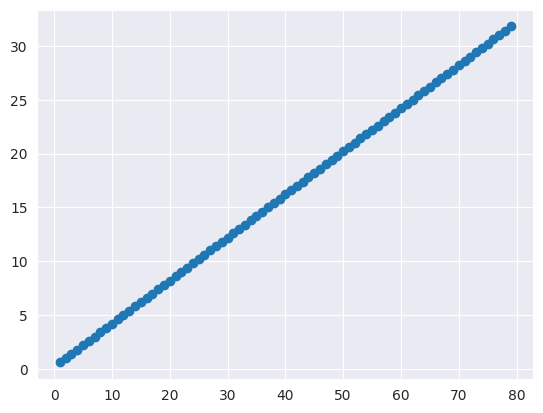

In [70]:
plt.scatter(train_data,train_data_y)

In [71]:
loss_fn=torch.nn.L1Loss()

In [72]:
optimizer=torch.optim.SGD(model_1.parameters(),lr=0.001)

In [73]:
epochs=100
for epoch in range(epochs):
    model_1.train()
    y_preds=model_1.forward(train_data)
    loss=loss_fn(y_preds,train_data_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(loss)

tensor(0.2767, grad_fn=<MeanBackward0>)


In [74]:
with torch.inference_mode():
    y_res=model_1.forward(test_data)

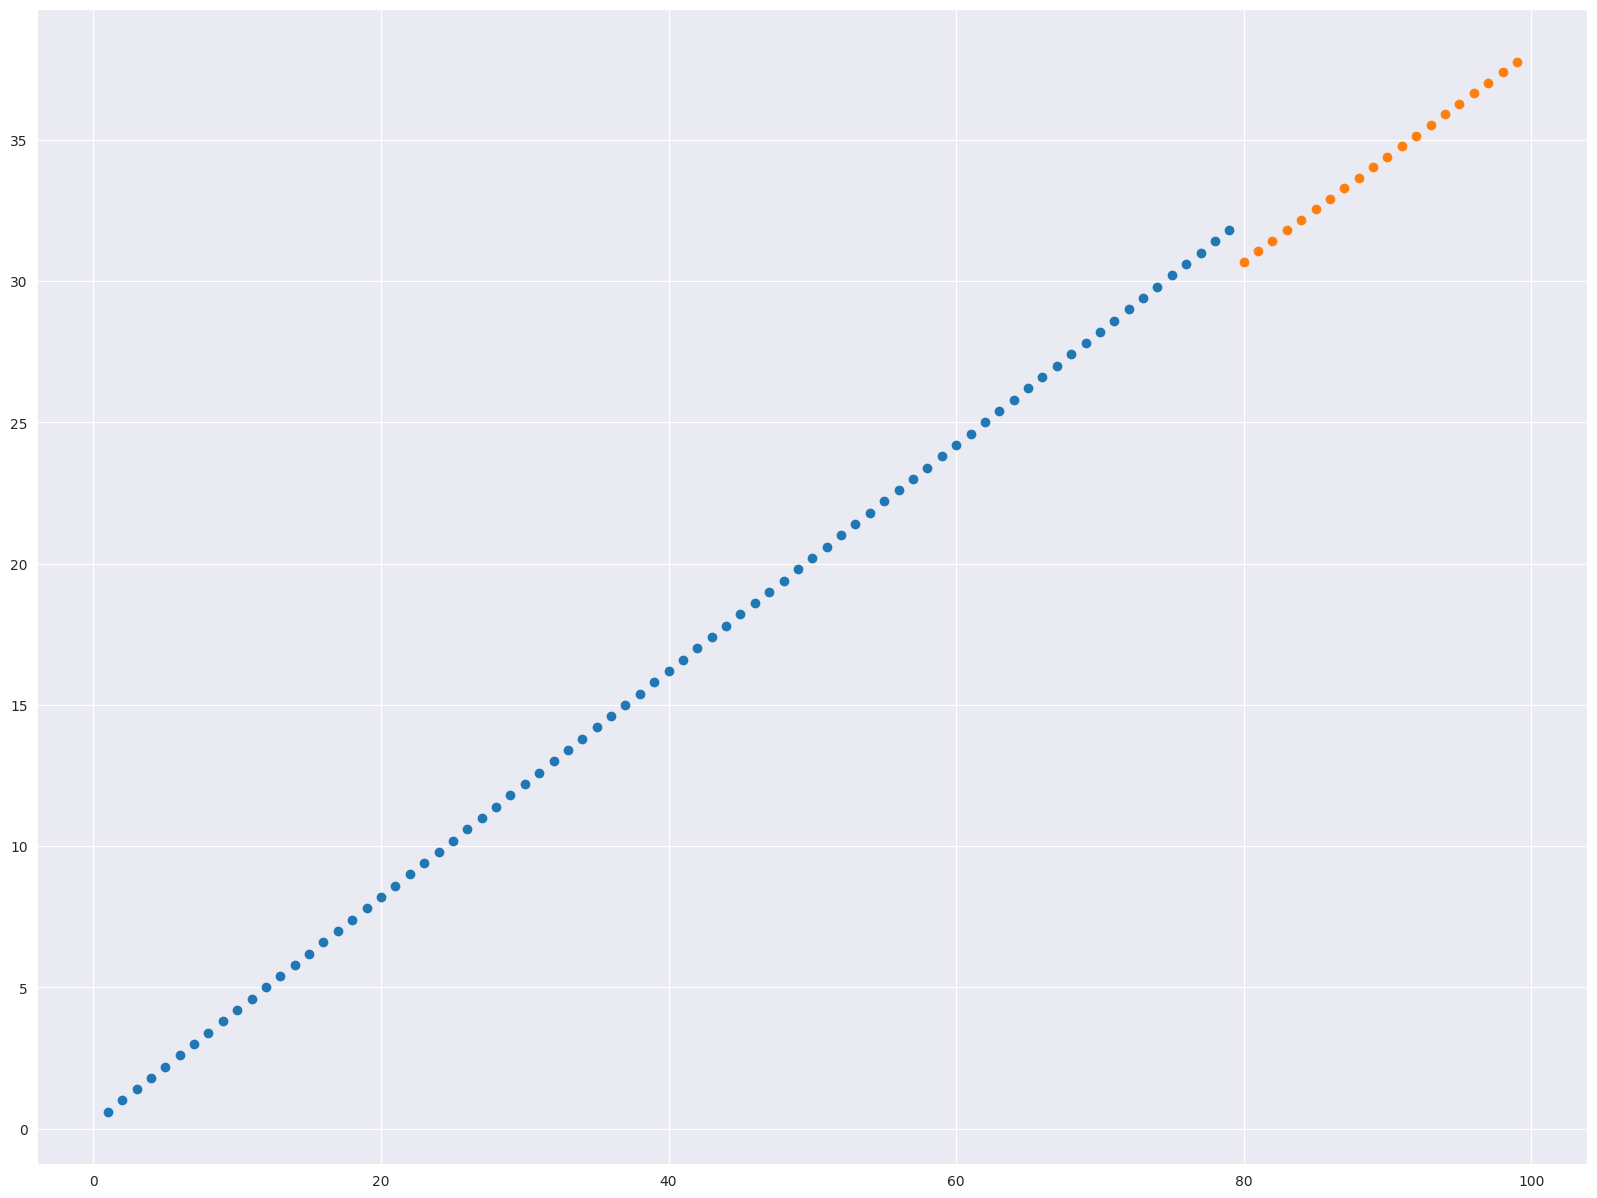

In [75]:
plt.figure(figsize=(20,15))
plt.scatter(train_data,train_data_y)
plt.scatter(test_data,y_res)

we will now use layers

In [76]:
class LinearRegressionModel2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=torch.nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)

In [77]:
model_2=LinearRegressionModel2()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3277]])),
             ('linear_layer.bias', tensor([-0.8697]))])

In [78]:
loss_fn2=torch.nn.L1Loss()

In [79]:
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.0001)

In [80]:
epochs=1000
for epoch in range(epochs):
    model_2.train()
    y_res=model_2.forward(train_data)
    loss=loss_fn2(y_res,train_data_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)

tensor(3.9627, grad_fn=<MeanBackward0>)
tensor(3.8026, grad_fn=<MeanBackward0>)
tensor(3.6425, grad_fn=<MeanBackward0>)
tensor(3.4824, grad_fn=<MeanBackward0>)
tensor(3.3223, grad_fn=<MeanBackward0>)
tensor(3.1622, grad_fn=<MeanBackward0>)
tensor(3.0021, grad_fn=<MeanBackward0>)
tensor(2.8420, grad_fn=<MeanBackward0>)
tensor(2.6819, grad_fn=<MeanBackward0>)
tensor(2.5218, grad_fn=<MeanBackward0>)
tensor(2.3617, grad_fn=<MeanBackward0>)
tensor(2.2016, grad_fn=<MeanBackward0>)
tensor(2.0415, grad_fn=<MeanBackward0>)
tensor(1.8814, grad_fn=<MeanBackward0>)
tensor(1.7213, grad_fn=<MeanBackward0>)
tensor(1.5612, grad_fn=<MeanBackward0>)
tensor(1.4011, grad_fn=<MeanBackward0>)
tensor(1.2410, grad_fn=<MeanBackward0>)
tensor(1.0809, grad_fn=<MeanBackward0>)
tensor(0.9208, grad_fn=<MeanBackward0>)
tensor(0.7607, grad_fn=<MeanBackward0>)
tensor(0.6006, grad_fn=<MeanBackward0>)
tensor(0.4662, grad_fn=<MeanBackward0>)
tensor(0.4425, grad_fn=<MeanBackward0>)
tensor(0.4394, grad_fn=<MeanBackward0>)


In [80]:
test_data=test_data.unsqueeze(1)
with torch.inference_mode():
    y_res=model_2.forward(test_data)

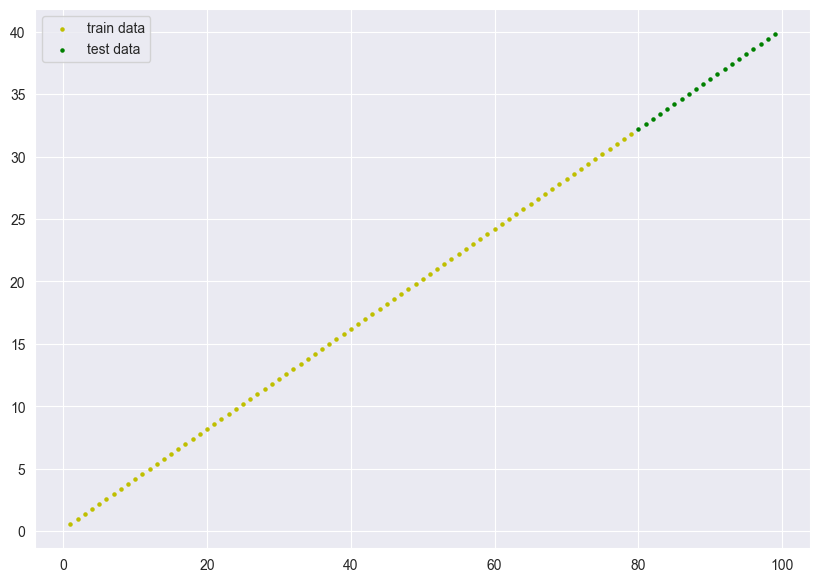

In [81]:
plot_predictions(train_data,train_data_y,test_data,y_res)